In [1]:
!pip install scikit-optimize

In [2]:
# ======================================
# 1. Import Libraries
# ======================================

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, RationalQuadratic, ConstantKernel
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from skopt import gp_minimize
from skopt.space import Real
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm

In [4]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [10]:
inputs6 = np.array([[0.7281861 , 0.15469257, 0.73255167, 0.69399651, 0.05640131],
       [0.24238435, 0.84409997, 0.5778091 , 0.67902128, 0.50195289],
       [0.72952261, 0.7481062 , 0.67977464, 0.35655228, 0.67105368],
       [0.77062024, 0.11440374, 0.04677993, 0.64832428, 0.27354905],
       [0.6188123 , 0.33180214, 0.18728787, 0.75623847, 0.3288348 ],
       [0.78495809, 0.91068235, 0.7081201 , 0.95922543, 0.0049115 ],
       [0.14511079, 0.8966846 , 0.89632223, 0.72627154, 0.23627199],
       [0.94506907, 0.28845905, 0.97880576, 0.96165559, 0.59801594],
       [0.12572016, 0.86272469, 0.02854433, 0.24660527, 0.75120624],
       [0.75759436, 0.35583141, 0.0165229 , 0.4342072 , 0.11243304],
       [0.5367969 , 0.30878091, 0.41187929, 0.38822518, 0.5225283 ],
       [0.95773967, 0.23566857, 0.09914585, 0.15680593, 0.07131737],
       [0.6293079 , 0.80348368, 0.81140844, 0.04561319, 0.11062446],
       [0.02173531, 0.42808424, 0.83593944, 0.48948866, 0.51108173],
       [0.43934426, 0.69892383, 0.42682022, 0.10947609, 0.87788847],
       [0.25890557, 0.79367771, 0.6421139 , 0.19667346, 0.59310318],
       [0.43216593, 0.71561781, 0.3418191 , 0.70499988, 0.61496184],
       [0.78287982, 0.53633586, 0.44328356, 0.85969983, 0.01032599],
       [0.9217762 , 0.93187122, 0.41487637, 0.59505727, 0.73562569],
       [0.12667892, 0.2914703 , 0.06452848, 0.6805146 , 0.89281919],
       [0.000025, 0.000025, 0.000025, 0.000025, 0.000025],
       [0.001200, 0.001200, 0.001200, 0.001200, 0.001200],
       [0.110000, 0.110000, 0.110000, 0.110000, 0.110000],
       [0.000100, 0.000100, 0.000100, 0.000100, 0.000100],
       [0.080000, 0.080000, 0.080000, 0.080000, 0.080000],
       [0.060000, 0.060000, 0.060000, 0.060000, 0.060000],
       [0.006000, 0.006000, 0.006000, 0.006000, 0.006000],
       [0.000050, 0.000050, 0.000050, 0.000050, 0.000050],
       [0.004000, 0.004000, 0.004000, 0.004000, 0.004000],
       [0.003000, 0.003000, 0.003000, 0.003000, 0.003000],
       [0.001000, 0.001000, 0.001000, 0.001000, 0.001000],
       [0.100000, 0.100000, 0.100000, 0.100000, 0.100000]])

X = inputs6

In [11]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [12]:
outputs6 = np.array([-0.71426495, -1.20995524, -1.67219994, -1.53605771, -0.82923655,
       -1.24704893, -1.23378638, -1.69434344, -2.57116963, -1.30911635,
       -1.14478485, -1.91267714, -1.62283895, -1.35668211, -2.0184254 ,
       -1.70255784, -1.29424696, -0.93575656, -2.15576776, -1.74688209, -2.175596881489829, -2.309401356709018, 
       -1.846466597343071, -2.371358550487239,
       -1.9141835496990587, -1.9109370393863767, -2.317634958798548, -2.2898336513920117,
       -2.3873922131353744, -2.285603684154324,-2.2971806715601018, -1.7808916495379146])

y = outputs6

In [13]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

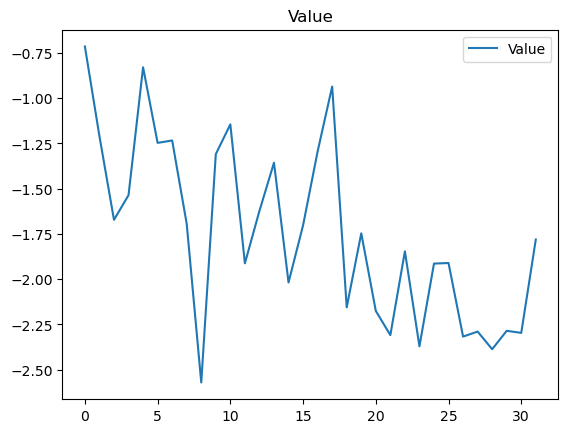

In [14]:
df = pd.DataFrame(outputs6, columns = ['Value'], index = range(outputs6.size))
plot = df.plot(title="Value")

In [15]:
#Define kernel used
kernel_best_Q6 = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1e2)) + ConstantKernel(2.0, (1e-3, 1e3)) * WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-9, 1e-1))

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(
    kernel=kernel_best_Q6,
    n_restarts_optimizer=30,
    alpha=1e-6,
    normalize_y=True)

# Fit GP
gp.fit(X, y)

#Print the kernel to check if the value of optimized kernel is normal 
print("Optimized kernel:", gp.kernel_)

Optimized kernel: 1.17**2 * RBF(length_scale=0.598) + 4.38**2 * WhiteKernel(noise_level=0.00112)


In [16]:
def hybrid_ucb(X, gp, kappa=0.1, alpha=0.5):
    mu, sigma = gp.predict(X, return_std=True)
    return alpha * mu + (1 - alpha) * (mu + kappa * sigma)

def optimize_acquisition_global(acquisition_func, gp, bounds, kappa=4.0, maxiter=100, popsize=30):
    # Objective to minimize (negative because DE minimizes)
    def objective(x):
        x = np.array(x).reshape(1, -1)
        return -acquisition_func(x, gp, kappa=kappa)[0]

    # Differential Evolution global optimization
    result = differential_evolution(
        objective,
        bounds=bounds,
        maxiter=maxiter,
        popsize=popsize,
        polish=True,       # refine the result locally at the end
        disp=True           # print optimization progress
    )

    x_next = result.x
    best_val = -result.fun
    return x_next, best_val

In [ ]:
bounds = [(0, 1), (0, 1), (0, 1), (0 ,1), (0, 1)]

next_point1, best_val1 = optimize_acquisition_global(
        acquisition_func=hybrid_ucb,
        gp=gp,
        bounds=bounds,
        kappa=0.05,      # larger kappa → more exploration
        maxiter=20000,     # number of DE iterations
        popsize=5000      # population size
    )

# Optimize acquisition
print("Next query point (by UCB):", next_point1)

differential_evolution step 1: f(x)= 0.4152126787566144
differential_evolution step 2: f(x)= 0.4126815386770233
